In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("pastel")
sns.set_theme(style="whitegrid")

## Logistic regression needs.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import classification_report

## grid search
from sklearn.model_selection import GridSearchCV

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
df = pd.read_csv('activity.csv')
df.columns = ['independent', 'responce']
df.head(6)

,independent,responce
0,96.229,0
1,84.746,0
2,82.449,0
3,106.560,0
4,80.152,0
5,19.292,1


## Tuning logistic regression

Some of the parameters of sklearn logistic regression are:

C: The inverse of the regularization strength. A larger value of C corresponds to a lower regularization strength, which leads to a more complex model.

penalty: The type of regularization to use. The default value is l2, which is the L2 norm. Other possible values are l1 and elasticnet.

solver: The algorithm to use for fitting the model. The default value is lbfgs, which is a limited-memory BFGS algorithm. Other possible values are newton-cg and sag.

max_iter: The maximum number of iterations to use for fitting the model. The default value is 100.

tol: The tolerance for convergence. The default value is 1e-4.

random_state: The random state to use for initializing the model. The default value is None.The parameters of sklearn logistic regression are:

C: The inverse of the regularization strength. A larger value of C corresponds to a lower regularization strength, which leads to a more complex model.

penalty: The type of regularization to use. The default value is l2, which is the L2 norm. Other possible values are l1 and elasticnet.

solver: The algorithm to use for fitting the model. The default value is lbfgs, which is a limited-memory BFGS algorithm. Other possible values are newton-cg and sag.

max_iter: The maximum number of iterations to use for fitting the model. The default value is 100.

tol: The tolerance for convergence. The default value is 1e-4.

random_state: The random state to use for initializing the model. The default value is None.

---

* The upper-left quadrant displays the number of **true negatives**.
* The bottom-left quadrant displays the number of **false negatives**.
* The upper-right quadrant displays the number of **false positives**.
* The bottom-right quadrant displays the number of **true positives**.

# TN | FP
# FN | TP

## MODEL clf01 

The parameters of this model where not adjusted.
    

accuracy score: 0.9798657718120806
# of iterations 22


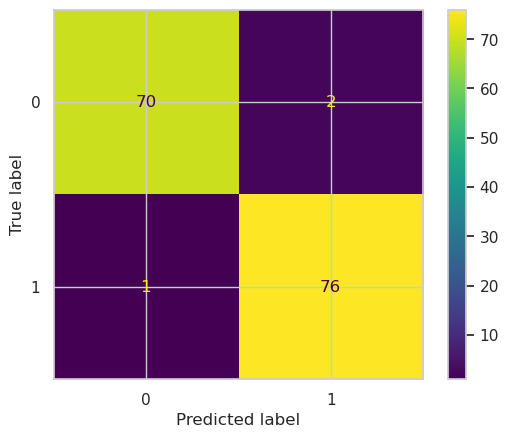

In [3]:
X = df[['independent']]
y = df[['responce']]

## Split dataset into training and holdout datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

## Fitting the model to the data, and saving it as a variable clf_lr: classifier logistic regression.
clf01 = LogisticRegression().fit(X_train, y_train.values.ravel())

## Obtaining predictions
y_pred = clf01.predict(X_test)

print('accuracy score: %s' % clf01.score(X_test, y_test))
print('# of iterations %s' % clf01.n_iter_[0])

# Calculate the values for each quadrant in the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf01.classes_)
# Create the confusion matrix as a visualization
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf01.classes_)
# Display the confusion matrix
disp.plot();

In [4]:
params = clf01.get_params()
params

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### Model cls_grs

Its better to use grid search.
Although the solver does not work with all penalties so it is appropiate to
group by the conditions between penalty and solver.

In [11]:
## Creating a logistic regression model.

model03 = LogisticRegression()

# Create a dictionary of hyperparameters to search over.
params1 = {
    'C': [1, 10, 100], 
    'max_iter': [5000, 10000],
    'penalty': ['l2'], 
    'solver': ['lbfgs', 'newton-cg', 'sag'],
    }
params2 = {
    'C': [1, 10, 100], 
    'max_iter': [2500, 5000, 10000],
    'penalty': ['l1', 'l2'], 
    'solver': ['liblinear', 'saga'],
    }
params3 = {
    'C': [1, 10, 100], 
    'max_iter': [5000, 10000],
    'penalty': ['l1', 'l2'], 
    'solver': ['saga'],
    }
params4 = {
    'C': [1, 10, 100], 
    'max_iter': [5000, 10000],
    'penalty': ['elasticnet'], 
    'solver': ['saga'],
    'l1_ratio' : [0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 0.99]
    }

params = [params1, params2, params3, params4]

## list of the best params
grids = []

for param in params:
    # Use the `GridSearchCV` class to perform the grid search.
    grid_search = GridSearchCV(model03, param, cv=5)
    grid_search.fit(X_train, y_train.values.ravel())

    # Print the best hyperparameters found by the grid search.
    grids.append(grid_search.best_params_)


### testing best params

In [12]:
for grid in grids:
    print(grid)

{'C': 1, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'lbfgs'}
{'C': 1, 'max_iter': 2500, 'penalty': 'l1', 'solver': 'liblinear'}
{'C': 1, 'max_iter': 5000, 'penalty': 'l1', 'solver': 'saga'}
{'C': 1, 'l1_ratio': 0.001, 'max_iter': 5000, 'penalty': 'elasticnet', 'solver': 'saga'}


accuracy score: 0.9798657718120806
# of iterations 22
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        72
           1       0.97      0.99      0.98        77

    accuracy                           0.98       149
   macro avg       0.98      0.98      0.98       149
weighted avg       0.98      0.98      0.98       149

accuracy score: 0.9798657718120806
# of iterations 15
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        72
           1       0.97      0.99      0.98        77

    accuracy                           0.98       149
   macro avg       0.98      0.98      0.98       149
weighted avg       0.98      0.98      0.98       149

accuracy score: 0.9865771812080537
# of iterations 1708
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.99      0.99      0.99        77

    accuracy      

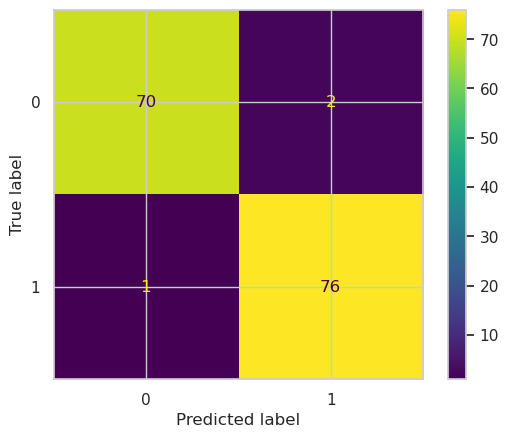

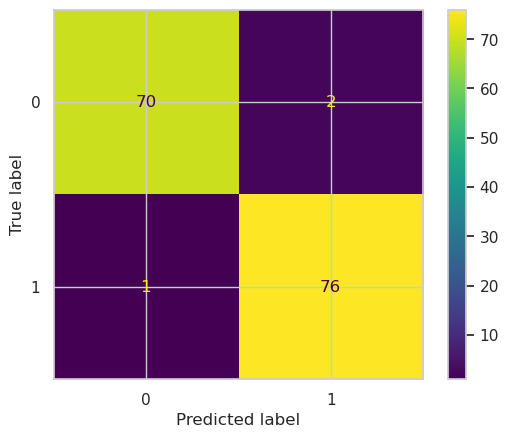

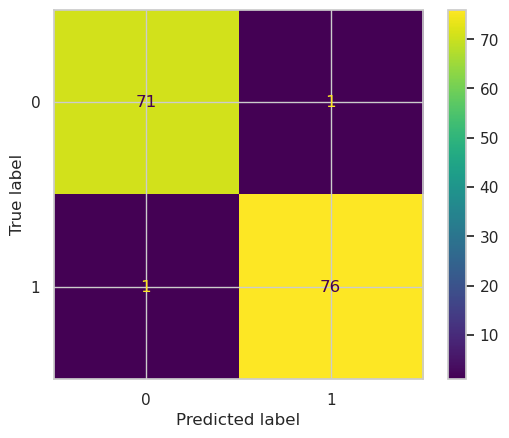

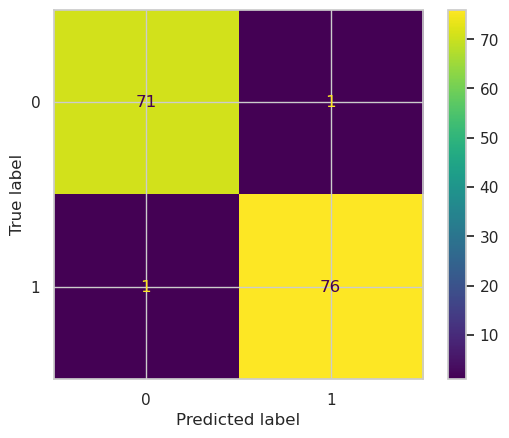

In [13]:

## And finally selecting the best parameters.

for grid in grids:
    clf = LogisticRegression()
    clf.set_params(**grid)
    clf.fit(X_train, y_train.values.ravel())
    ## Obtaining predictions
    y_pred = clf.predict(X_test)

  

    # Calculate the values for each quadrant in the confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
    # Create the confusion matrix as a visualization
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
    # Display the confusion matrix
    
    print('accuracy score: %s' % clf.score(X_test, y_test))
    print('# of iterations %s' % clf.n_iter_[0])
    print(classification_report(y_test, y_pred))
    disp.plot();
    